In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the datasets
concrete_df = pd.read_csv('2_concrete_dry_bumpy_flat_hard.csv')
asphalt_df = pd.read_csv('5_asphalt_dry_flat_hard.csv')
grass_df = pd.read_csv('5_asphalt_dry_flat_hard.csv')


In [2]:
concrete_df.head()

,2024-03-09 13:05:16.280,-0.013428,-0.030273,1.049561,-0.045776,-0.045776.1,-0.274658
0,2024-03-09 13:05:16.299,-0.013672,-0.031982,1.046387,-0.091553,-0.137329,-0.442505
1,2024-03-09 13:05:16.319,-0.012695,-0.034668,1.044922,-0.091553,-0.198364,-0.488281
2,2024-03-09 13:05:16.340,-0.011719,-0.034180,1.047607,-0.137329,-0.122070,-0.610352
3,2024-03-09 13:05:16.360,-0.012939,-0.032715,1.047363,-0.137329,-0.076294,-0.640869
4,2024-03-09 13:05:16.379,-0.013428,-0.031006,1.045898,-0.137329,-0.030518,-0.625610


In [3]:
asphalt_df.head()

,2024-03-09 13:58:18.280,-0.070068,-0.056641,1.045898,0.000000,-0.030518,-0.427246
0,2024-03-09 13:58:18.299,-0.063965,-0.055664,1.046387,0.045776,0.030518,-0.854492
1,2024-03-09 13:58:18.319,-0.046387,-0.047852,1.045166,0.061035,-0.076294,-1.098633
2,2024-03-09 13:58:18.340,-0.029785,-0.039551,1.048096,0.061035,-0.091553,-0.976562
3,2024-03-09 13:58:18.360,-0.031006,-0.036865,1.046143,-0.045776,-0.061035,-0.549316
4,2024-03-09 13:58:18.379,-0.047363,-0.040039,1.046875,-0.030518,-0.061035,-0.091553


In [4]:
# Calculate the magnitude of acceleration for the concrete dataset
# This involves the readings from the X, Y, and Z axes of the accelerometer
concrete_df['accel_magnitude'] = np.sqrt(
    concrete_df.iloc[:, 1]**2 +  # Square of X-axis acceleration
    concrete_df.iloc[:, 2]**2 +  # Square of Y-axis acceleration
    concrete_df.iloc[:, 3]**2    # Square of Z-axis acceleration
)


- we Calculate the magnitude of acceleration and gyroscope readings for each dataset

- The magnitude is calculated using the Euclidean norm formula: sqrt(x^2 + y^2 + z^2)

- This combines the accelerometer readings (X, Y, Z) into a single magnitude value

- It simplifies the dataset from 3D motion data to a scalar value representing overall motion intensity


In [6]:
# Calculate acceleration magnitude for concrete dataset
concrete_df['accel_magnitude'] = np.sqrt(concrete_df.iloc[:, 1]**2 + concrete_df.iloc[:, 2]**2 + concrete_df.iloc[:, 3]**2)



In [7]:
 #Calculate acceleration magnitude for asphalt dataset
asphalt_df['accel_magnitude'] = np.sqrt(asphalt_df.iloc[:, 1]**2 + asphalt_df.iloc[:, 2]**2 + asphalt_df.iloc[:, 3]**2)

In [8]:
# Calculate acceleration magnitude for grass dataset
grass_df['accel_magnitude'] = np.sqrt(grass_df.iloc[:, 1]**2 + grass_df.iloc[:, 2]**2 + grass_df.iloc[:, 3]**2)


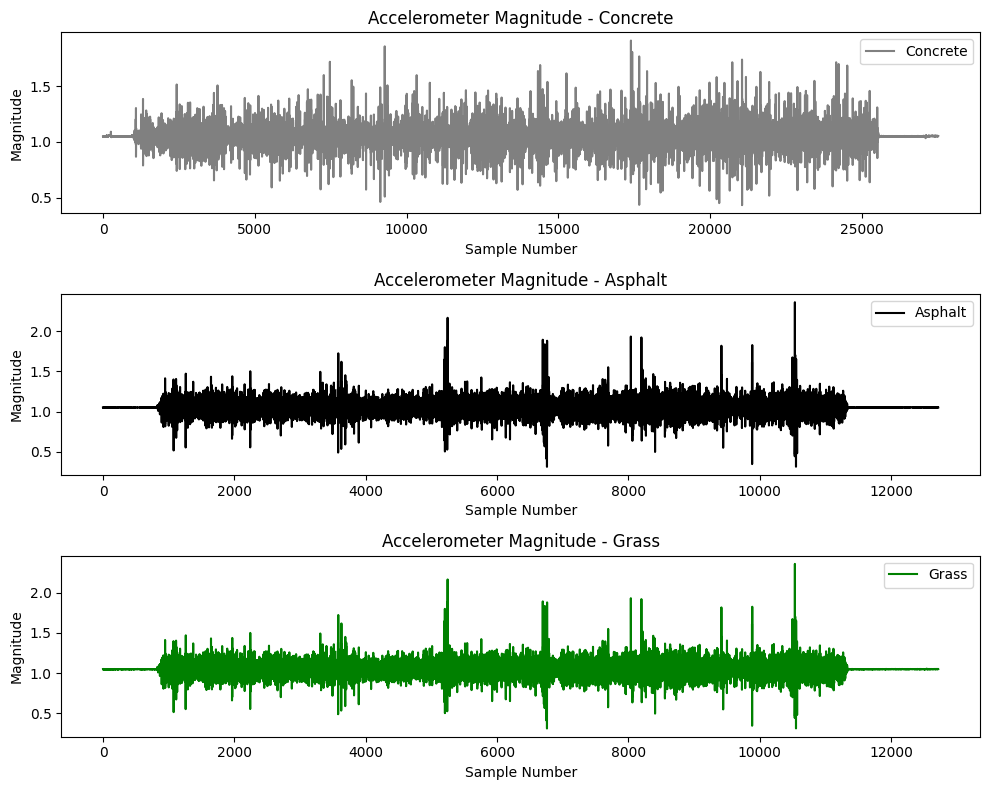

In [10]:
# Step 4: Plotting the accelerometer magnitude for each surface type
# This visualizes the overall motion intensity captured by the accelerometer across different surfaces

# Initialize a plot with 3 rows and 1 column, setting the figure size
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Plot accelerometer magnitude for concrete
ax[0].plot(concrete_df['accel_magnitude'], label='Concrete', color='grey')
ax[0].set_title('Accelerometer Magnitude - Concrete')
ax[0].set_xlabel('Sample Number')
ax[0].set_ylabel('Magnitude')
ax[0].legend();

# Plot accelerometer magnitude for asphalt
ax[1].plot(asphalt_df['accel_magnitude'], label='Asphalt', color='black')
ax[1].set_title('Accelerometer Magnitude - Asphalt')
ax[1].set_xlabel('Sample Number')
ax[1].set_ylabel('Magnitude')
ax[1].legend()

# Plot accelerometer magnitude for grass
ax[2].plot(grass_df['accel_magnitude'], label='Grass', color='green')
ax[2].set_title('Accelerometer Magnitude - Grass')
ax[2].set_xlabel('Sample Number')
ax[2].set_ylabel('Magnitude')
ax[2].legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()


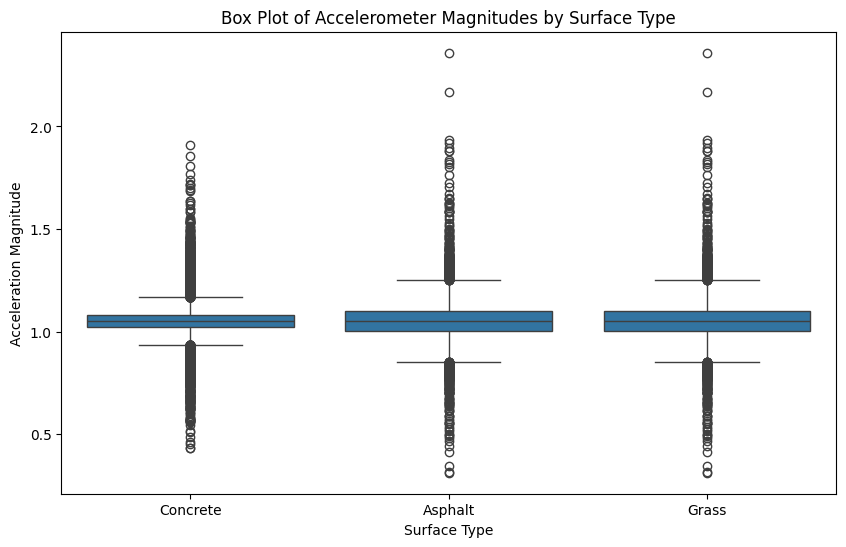

In [11]:
#  Combine the datasets into a single DataFrame with an additional 'Surface' column
concrete_df['Surface'] = 'Concrete'
asphalt_df['Surface'] = 'Asphalt'
grass_df['Surface'] = 'Grass'

# Combine the three DataFrames into one
combined_df = pd.concat([concrete_df[['accel_magnitude', 'Surface']], 
                         asphalt_df[['accel_magnitude', 'Surface']], 
                         grass_df[['accel_magnitude', 'Surface']]], axis=0)

 Create a box plot
plt.figure(figsize=(10, 6))

# Create a box plot for the 'accel_magnitude' column, grouped by the 'Surface' column
sns.boxplot(x='Surface', y='accel_magnitude', data=combined_df)
plt.title('Box Plot of Accelerometer Magnitudes by Surface Type')
plt.xlabel('Surface Type')
plt.ylabel('Acceleration Magnitude')
plt.show()

## We can see the following from the box plot

1- All three surface types appear to have a similar median acceleration magnitude indicating that there is little variation in the average movement intensity between them

2- There are many outliers for all surfaces.This suggests that accelerations often differ from the average, which is expected when people walk, since they might take bigger steps, trip, or speed up and slow down

3- The IQR shows that the spread of acceleration values is quite similar across surfaces but the grass has a bit more variation due to its uneven terrain

4- Grass shows a slightly higher range and more outliers than Concrete and Asphalt.This could be because grass is bumpier and softer making the rollator move less smoothly
